## Sales Forecasting Using Time Series Analysis

In this analysis, we will perform the following steps to evaluate the sales performance and profitability of different products, sales mediums, and locations:
* Profitability Analysis by Product: Calculate the total sales and profitability of each product.
* Sales Medium Analysis: Evaluate sales performance across different sales channels.
* Geospatial Analysis: Visualize sales locations and their corresponding revenues using a map to identify hotspots.

The goal is to provide actionable insights to improve sales performance and resource allocation.

### 1. Data Loading and Basic Information

We will start by loading the dataset, which contains information about product sales, total revenue, and the sales medium used. This step will help us understand the structure of the dataset and identify the columns necessary for further analysis.

In [1]:
import pandas as pd

# Load the dataset from an Excel file
df = pd.read_excel("C:/Users/muge/Dropbox/GMU/Portfolio/Nestle/NESTLE SALES DATASET.xlsx")

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18115 entries, 0 to 18114
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sales ID        18115 non-null  object        
 1   Date            18115 non-null  datetime64[ns]
 2   Product Name    18115 non-null  object        
 3   Total Revenue   18115 non-null  float64       
 4   Sales Location  18115 non-null  object        
 5   Sales Medium    18115 non-null  object        
 6   Sales count     18115 non-null  int64         
 7   Product Count   18115 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.1+ MB
None


### 2. Profitability Analysis by Product

In this section, we will calculate the total sales count, total revenue, and profitability for each product. Profitability will be calculated as Revenue per Sale.

* We group the data by Product Name and calculate the total sales count, total revenue, and product count for each product.
* We calculate Profitability as Total Revenue / Sales Count to get the revenue generated per sale for each product.
* The result is displayed in a summary table for easy interpretation.

In [2]:
# Grouping by Product Name to calculate profitability
df_profitability = df.groupby('Product Name').agg({
    'Sales count': 'sum',  # Total number of sales for each product
    'Total Revenue': 'sum',  # Total revenue for each product
    'Product Count': 'sum'  # Total count of products sold for each product
}).reset_index()

# Calculate profitability (Revenue per sale)
df_profitability['Profitability'] = df_profitability['Total Revenue'] / df_profitability['Sales count']

# Display profitability per product
print(df_profitability[['Product Name', 'Sales count', 'Total Revenue', 'Profitability']])

       Product Name  Sales count  Total Revenue  Profitability
0           Kit Kat         1978     2226687.31    1125.726648
1             Maggi         1555     2226571.83    1431.878990
2              Milo         1619     5952661.22    3676.751834
3           Nes Cau         1457     3305206.60    2268.501441
4           Nescafe         6368     5540926.55     870.120375
5      Nescafe Gold         1299     1729243.88    1331.211609
6       Nesquik Duo         1014     4274963.56    4215.940394
7  Nestle Drumstick         2028     3199164.78    1577.497426
8          Smarties          797     2364330.72    2966.537917


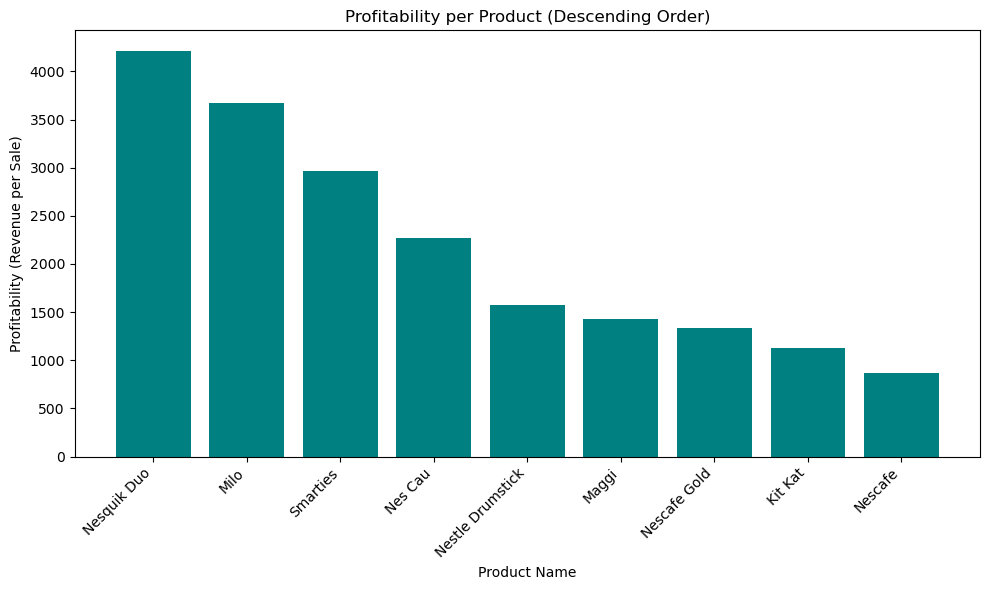

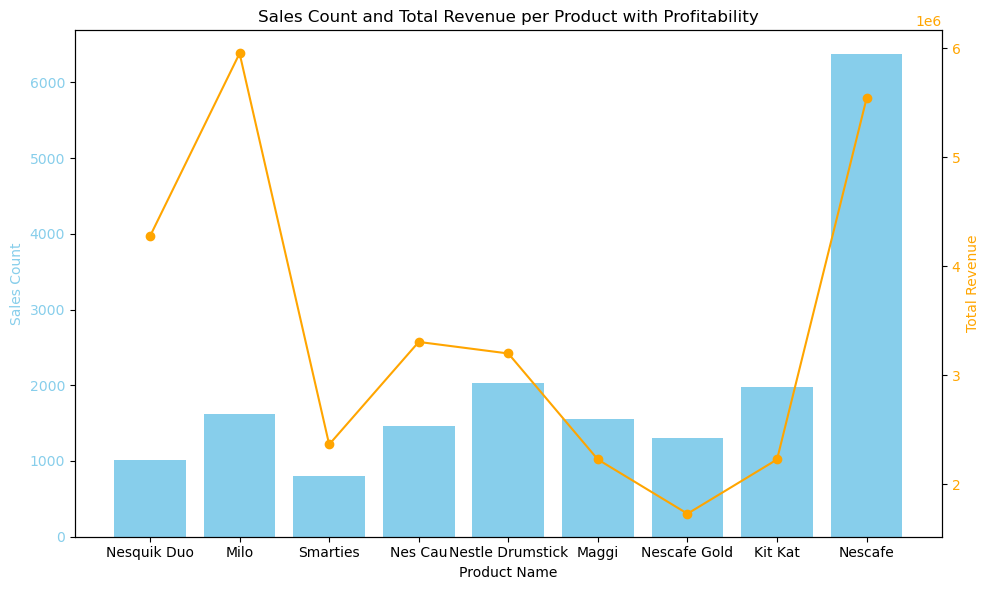

In [3]:
import matplotlib.pyplot as plt
# Sort the data by profitability in descending order
df_profitability_sorted = df_profitability.sort_values('Profitability', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for profitability in descending order
bars = ax.bar(df_profitability_sorted['Product Name'], df_profitability_sorted['Profitability'], color='teal', label='Profitability')

# Add labels and title
ax.set_xlabel('Product Name')
ax.set_ylabel('Profitability (Revenue per Sale)')
ax.set_title('Profitability per Product (Descending Order)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# Optionally: we can also plot sales count and total revenue on the same graph using secondary axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting sales count on the primary axis
ax1.bar(df_profitability_sorted['Product Name'], df_profitability_sorted['Sales count'], color='skyblue', label='Sales Count')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Sales Count', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Creating a second y-axis for Total Revenue and Profitability
ax2 = ax1.twinx()
ax2.plot(df_profitability_sorted['Product Name'], df_profitability_sorted['Total Revenue'], color='orange', label='Total Revenue', marker='o')
ax2.set_ylabel('Total Revenue', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Title and layout
plt.title('Sales Count and Total Revenue per Product with Profitability')
plt.tight_layout()

# Show the plot
plt.show()

This first chart is a bar chart that displays the profitability per product in descending order. 

Interpretation:
* Nesquik Duo is the Most Profitable: Nesquik Duo has the highest profitability per sale among the listed products.
* Profitability Varies Significantly: There's a noticeable difference in profitability between the products. Nesquik Duo has significantly higher profitability than Nescafe, for example.
* Clear Ranking: The descending order makes it easy to quickly see the relative profitability of each product.
* Potential Insights for Business Decisions: This chart provides valuable information for business decisions, such as:
    * Resource Allocation: The company might want to allocate more resources (e.g., marketing, production) to the most profitable products.
    * Pricing Strategies: The company could analyze the pricing strategies of the most profitable products to see if they can be applied to other products.
    * Product Development: The company might want to investigate the characteristics of the most profitable products to inform future product development.
    * Product Portfolio Analysis: The chart highlights the diversity of profitability within the product portfolio, which can inform strategic decisions about which products to focus on or discontinue.
* Visual Clarity: The chart is visually clear and easy to understand, making it effective for communicating profitability information.

Possible Further Analysis:
* Profit Margin vs. Total Profit: While this chart shows profitability per sale, it doesn't show the total profit generated by each product. A product with a lower profit margin but higher sales volume could still generate significant total profit.
* Cost Analysis: Understanding the costs associated with each product could provide a more complete picture of profitability.
* Market Share: Analyzing the market share of each product could provide further insights into their performance.
* Time Series Analysis: Analyzing the profitability of each product over time could reveal trends and patterns.

This chart effectively communicates the relative profitability of different products, providing valuable insights for business decisions.

The second chart is a combination bar and line chart that displays Sales Count and Total Revenue per product, with the products arranged in descending order of profitability. 

Interpretation:
* Sales Count vs. Total Revenue Relationship: The chart allows us to compare sales count and total revenue for each product.
    * Nesquik Duo: High sales count, but relatively low total revenue, suggesting a lower price point or lower individual sale value.
    * Milo: Moderate sales count, with significantly higher total revenue, indicating a higher price point or higher individual sale value.
    * Smarties: Low sales count and low total revenue.
    * Nes Cau: Moderate sales count and moderate total revenue.
    * Nestle Drumstick: Moderate sales count and moderate total revenue.
    * Maggi: Low sales count and low total revenue.
    * Nescafe Gold: Low sales count and very low total revenue.
    * Kit Kat: Moderate sales count and moderate total revenue.
    * Nescafe: High sales count and very high total revenue.
* Profitability Insights: The arrangement in descending order of profitability provides additional insights:
    * Products with higher profitability (towards the left) don't necessarily have the highest sales count or total revenue.
    * Nescafe, despite being the least profitable, has the highest sales count and total revenue, suggesting high volume sales.
    * Nesquik Duo has a high sales count but lower revenue, which could indicate a lower profit margin.
* Business Implications:
    * The company might want to focus on increasing the profitability of high-volume products like Nescafe.
    * The high profitability of Nesquik Duo, despite lower revenue, suggests it might be a key product for profit margins.
    * The low sales count and revenue of Smarties, Maggi, and Nescafe Gold might indicate a need for strategic review.
Visual Clarity: The chart effectively combines bars and a line to present two different metrics, allowing for easy comparison.

Possible Further Analysis:
* Profit Margin: Adding profit margin information would provide a more complete picture of profitability.
* Cost Analysis: Understanding the costs associated with each product would help explain the profitability differences.
* Market Share: Analyzing the market share of each product could provide further insights into their performance.
* Pricing Strategies: Investigating the pricing strategies of each product could explain the differences in revenue.

This chart effectively displays the relationship between sales count and total revenue for different products, arranged in descending order of profitability. It highlights the importance of considering both sales volume and revenue when assessing product performance and profitability.

### 3. Sales Medium Analysis

Next, we will analyze the performance of different Sales Mediums (e.g., Online, Retail) by calculating their total sales and revenue. Additionally, we will calculate the Revenue per Sale for each medium and identify inefficient mediums.

* The dataset is grouped by Sales Medium to calculate the total sales count and revenue.
* The Revenue per Sale for each sales medium is calculated to evaluate the efficiency of each sales channel.
* Sales mediums with a Revenue per Sale lower than the median are flagged as inefficient.

In [4]:
# Group by Sales Medium and calculate the total sales count and revenue
df_medium_analysis = df.groupby('Sales Medium').agg({
    'Sales count': 'sum',
    'Total Revenue': 'sum'
}).reset_index()

# Calculate Revenue per Sale for each medium
df_medium_analysis['Revenue per Sale'] = df_medium_analysis['Total Revenue'] / df_medium_analysis['Sales count']

# Identify inefficient sales mediums where Revenue per Sale is low
median_revenue_per_sale = df_medium_analysis['Revenue per Sale'].median()
inefficient_mediums = df_medium_analysis[df_medium_analysis['Revenue per Sale'] < median_revenue_per_sale]

print(inefficient_mediums)

  Sales Medium  Sales count  Total Revenue  Revenue per Sale
1       Online         6963     7016021.37       1007.614731


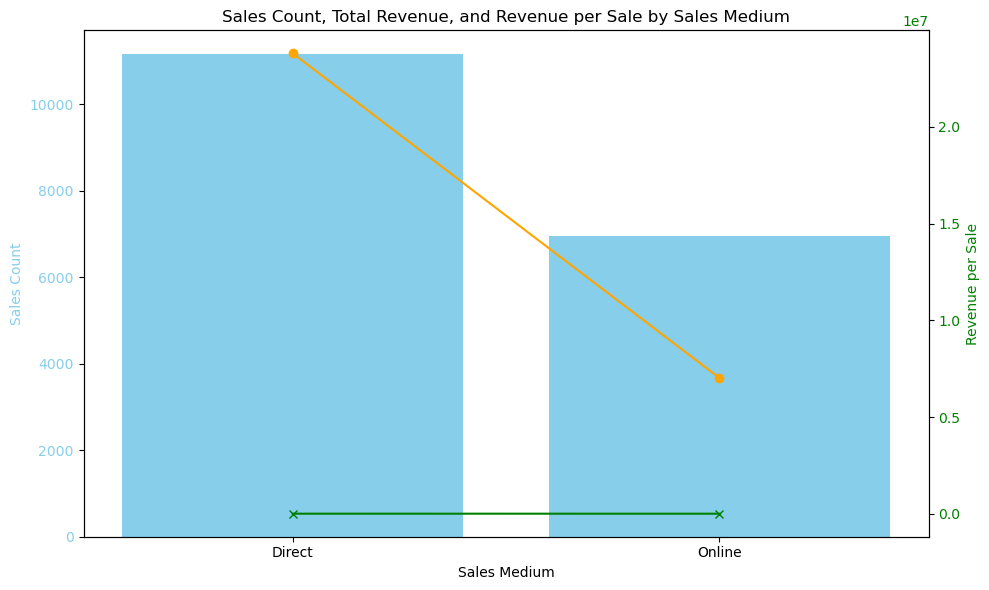

  Sales Medium  Sales count  Total Revenue  Revenue per Sale
1       Online         6963     7016021.37       1007.614731


In [5]:
# Plotting the Sales Medium Analysis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Sales Count
ax1.bar(df_medium_analysis['Sales Medium'], df_medium_analysis['Sales count'], color='skyblue', label='Sales Count')
ax1.set_xlabel('Sales Medium')
ax1.set_ylabel('Sales Count', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Creating a second y-axis for Total Revenue and Revenue per Sale
ax2 = ax1.twinx()

# Plot Total Revenue as a line plot
ax2.plot(df_medium_analysis['Sales Medium'], df_medium_analysis['Total Revenue'], color='orange', label='Total Revenue', marker='o')
ax2.set_ylabel('Total Revenue', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Plot Revenue per Sale as a line plot
ax2.plot(df_medium_analysis['Sales Medium'], df_medium_analysis['Revenue per Sale'], color='green', label='Revenue per Sale', marker='x')
ax2.set_ylabel('Revenue per Sale', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Title and layout
plt.title('Sales Count, Total Revenue, and Revenue per Sale by Sales Medium')
plt.tight_layout()

# Show the plot
plt.show()

# Identify inefficient sales mediums where Revenue per Sale is low
median_revenue_per_sale = df_medium_analysis['Revenue per Sale'].median()
inefficient_mediums = df_medium_analysis[df_medium_analysis['Revenue per Sale'] < median_revenue_per_sale]

# Print inefficient mediums
print(inefficient_mediums)

This chart is a complex combination chart presenting Sales Count, Total Revenue, and Revenue per Sale across two sales mediums: Direct and Online. Let's break down the interpretation:

Key Components:
* X-axis: "Sales Medium" categorizes the sales into "Direct" and "Online."
* Left Y-axis (Sales Count): This axis represents the number of sales (sales count) for each medium, shown as light blue bars.
* Right Y-axis (Revenue per Sale): This axis represents the revenue generated per individual sale, shown as an orange line with markers.
* Total Revenue: This is represented by a green line with markers that is flat, indicating that the total revenue is the same for both mediums.
* Bars (Sales Count): The light blue bars represent the sales count for each medium. The height of the bar indicates the number of sales.
* Orange Line (Revenue per Sale): The orange line with markers represents the revenue per sale for each medium. The position of the marker indicates the revenue per sale value.
* Green Line (Total Revenue): The green line with markers represents the total revenue generated for each medium. The flat line indicates that the total revenue is the same for both mediums.
* Data Table: A small data table below the chart provides the exact numerical values for each metric for the "Online" sales medium.

Interpretation:
* Direct vs. Online Sales Count:
    * Direct sales have a significantly higher sales count than online sales.
* Revenue per Sale:
    * Direct sales have a much higher revenue per sale than online sales.
* Total Revenue:
    * The total revenue generated is the same for both direct and online sales.
* Key Insights:
    * While direct sales have a higher volume and higher revenue per sale, the total revenue is equal to the online sales. This suggests that the lower sales count of online sales is compensated by a higher volume of items sold online, or that online sales are for cheaper items.
    * The higher revenue per sale in the direct medium can be attributed to sales of more expensive items.
    * The lower revenue per sale online can be attributed to sales of cheaper items.
* Business Implications:
    * Understanding the reasons behind the differences in revenue per sale can inform pricing and product strategies.
    * The company might want to explore strategies to increase online sales volume or revenue per sale.
    * The company might want to explore why the direct sales have such a high revenue per sale.
* Data Table:
    * The data table provides the exact numerical values for online sales, which can be helpful for precise analysis.

Possible Further Analysis:
* Cost Analysis: Understanding the costs associated with each sales medium would provide a more complete picture of profitability.
* Customer Segmentation: Analyzing customer demographics and purchasing behavior across the two mediums could reveal valuable insights.
* Marketing Strategies: Investigating the marketing strategies used for each medium could explain the differences in sales count and revenue.

This chart highlights the differences in sales count and revenue per sale between direct and online sales, while also showing that the total revenue is the same for both. It provides valuable insights for business decisions related to pricing, product strategy, and marketing.

### 4. Geospatial Sales Analysis

Finally, we will analyze the Sales Locations to visualize the distribution of total revenue across different locations. This will help us identify sales hotspots and areas requiring attention.

* Geocoding: The geolocator.geocode() function is used to get the coordinates (latitude and longitude) for each sales location by appending ", Australia" to the location name to ensure accurate results.
* Folium Map: We create a Folium map and add markers for each sales location, using the latitude and longitude obtained from geocoding.
* HTML File: The map is saved as an HTML file (sales_locations_map.html), which we can open in a web browser.* A sample dataset of sales locations (with their Latitude, Longitude, and Total Revenue) is used to create a map.

In [6]:
unique_sales_locations = df['Sales Location'].unique()
print(unique_sales_locations)

['Australian Capital Territory' 'New South Wales' 'Northern Territory'
 'Queensland' 'South Australia' 'Tasmania' 'Victoria' 'Western Australia']


In [7]:
#!pip install geopy

In [8]:
import folium
import pandas as pd
from geopy.geocoders import Nominatim

# Group by Sales Location and aggregate the Total Revenue
df_location_revenue = df.groupby('Sales Location').agg({
    'Total Revenue': 'sum'
}).reset_index()

# Group by Sales Location and aggregate both Total Revenue and Total Sales (Sales count)
df_location_sales = df.groupby('Sales Location').agg({
    'Total Revenue': 'sum',
    'Sales count': 'sum'
}).reset_index()

# Initialize empty columns for Latitude and Longitude
df_location_sales['Latitude'] = None
df_location_sales['Longitude'] = None

# Geocode each location to get the latitude and longitude
geolocator = Nominatim(user_agent="myGeocoder")
for i, row in df_location_sales.iterrows():
    location_info = geolocator.geocode(row['Sales Location'] + ", Australia")  # Adding country name to help geocode
    if location_info:
        df_location_sales.at[i, 'Latitude'] = location_info.latitude
        df_location_sales.at[i, 'Longitude'] = location_info.longitude

# Display the DataFrame with coordinates, total revenue, and total sales
print(df_location_sales)

# Create a folium map centered around the average location
map_center = [df_location_sales['Latitude'].mean(), df_location_sales['Longitude'].mean()]
sales_map = folium.Map(location=map_center, zoom_start=5)

# Add markers for each sales location
for _, row in df_location_sales.iterrows():
    if row['Latitude'] and row['Longitude']:  # Only add marker if coordinates are available
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"Location: {row['Sales Location']}<br>Total Revenue: ${row['Total Revenue']:,.2f}<br>Total Sales: {row['Sales count']}"
        ).add_to(sales_map)

# Save the map as an HTML file
sales_map.save("sales_locations_map_with_revenue_and_sales.html")

                 Sales Location  Total Revenue  Sales count   Latitude  \
0  Australian Capital Territory     3102358.07         1918  -35.48835   
1               New South Wales     4250257.49         2610 -31.875984   
2            Northern Territory     4143288.90         2376  -19.85161   
3                    Queensland     4309199.02         2555 -22.164678   
4               South Australia     5508722.33         3143 -30.534367   
5                      Tasmania     5380671.89         3187 -42.035067   
6                      Victoria     3640113.71         2055  -36.59861   
7             Western Australia      485145.04          271   -25.2303   

    Longitude  
0  149.002694  
1  147.286949  
2  133.230337  
3   144.58449  
4  135.630121  
5  146.636689  
6  144.678005  
7  121.018725  


Output:
* Sales Location with Coordinates: The df_locations DataFrame will contain the sales locations along with their corresponding latitude and longitude.
* Interactive Map: The map will be saved as an HTML file, which we can open in any browser. Each location will be marked, and we can click on the markers to view the location name.

Business Implications of Visualizing Sales Locations with Revenue and Sales Data on a Map:
1. Targeted Marketing and Sales Strategies:
    * By analyzing the Total Revenue and Total Sales for each location on the map, we can identify regions with high performance (both revenue and sales).
    * Actionable Insight: Focus marketing efforts or promotional campaigns on high-performing regions to further boost sales. For example, regions with high total revenue but low sales might benefit from targeted promotional offers to increase the number of sales.
2. Geographic Performance Analysis:
    * we can assess which sales locations are underperforming by comparing their revenue and sales count relative to other locations.
    * Actionable Insight: In underperforming regions, we might identify operational inefficiencies, such as logistical challenges, poor customer service, or weak product demand. Addressing these issues can increase revenue.
    * Alternatively, we might find that certain locations need more attention or resources, such as additional stock or stronger local sales teams.
3. Sales Channel Optimization:
    * If we have a mixed sales channel strategy (e.g., online vs. offline), the map could reveal which channels are performing better in different regions. Sales data could potentially be segmented by channel, so we can understand which medium (e.g., physical stores, e-commerce platforms, etc.) is performing best in specific locations.
    * Actionable Insight: Allocate resources more efficiently by investing more in the sales channels that are performing better in specific regions.
4. Logistical Planning:
    * The map can reveal sales clusters, which may assist in refining distribution and logistics. If certain areas show high revenue and sales, we might want to optimize inventory distribution to meet the demand in those areas more efficiently.
    * Actionable Insight: Use sales location data to plan the supply chain and optimize transportation routes, ensuring that high-performing areas are always well-stocked and low-performing areas are not overstocked.
5. Regional Pricing and Product Strategy:
    * Regional Trends: Different locations may have different market conditions. For instance, some regions may have more demand for premium products, while others may be more price-sensitive.
    * Actionable Insight: The map helps in tailoring pricing strategies based on location. We can set differentiated pricing or offer region-specific products based on local preferences.
6. Resource Allocation and Budgeting:
    * Knowing which locations are generating the most revenue allows us to allocate budgets or sales incentives more effectively. High-revenue locations may justify higher investments in marketing, training, or staffing to maximize returns.
    * Actionable Insight: Prioritize investment in regions that are proving to be more profitable while optimizing or cutting costs in underperforming areas.
7. Customer Segmentation and Demographic Insights:
    * By analyzing sales data on a geographic map, we can identify demographic patterns and potentially uncover new customer segments. Certain locations may perform well due to specific demographic traits or local trends.
    * Actionable Insight: Target customer segmentation efforts based on geographic data, offering tailored promotions or adjusting product offerings to fit local customer profiles.
8. Competitive Intelligence:
    * The map might also reveal competitors’ strengths and weaknesses if combined with data such as market share or competitor sales in specific locations.
    * Actionable Insight: we can decide whether to enter a market or adjust strategies based on competitors' performance in the same region. If competitors are performing poorly in certain areas, this presents an opportunity for market penetration.
9. Strategic Expansion Decisions:
    * If certain regions consistently show strong sales and revenue, teh company may want to expand  business or invest further in these high-potential areas.
    * Actionable Insight: Expansion into similar regions or increasing product availability could significantly boost business performance in key markets.

Conclusion:
By visualizing the Sales Location, Total Revenue, and Sales Count on a map, we gain actionable insights into the geographic distribution of business performance. These insights can drive smarter business decisions, whether it's refining marketing strategies, optimizing logistics, or enhancing product offerings based on regional preferences. The ability to make data-driven decisions, specifically tailored to geographic insights, can lead to increased profitability, more efficient operations, and improved customer satisfaction.

Conclusion

In this analysis, we provided insights into product profitability, sales medium performance, and geographical distribution of sales revenues. The findings can be used to:
* Optimize the sales strategy by focusing on profitable products and efficient sales channels.
* Allocate resources effectively to locations that generate higher revenue.

By using Profitability Analysis, Sales Medium Efficiency, and Geospatial Visualization, we can make data-driven decisions that support business growth and performance improvement.